In [ ]:
#!pip install tweepy

In [ ]:
#!pip install twitter

In [ ]:
#!pip install textblob

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install spacy

In [ ]:
#!pip install pip setuptools wheel
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [ ]:
#!python -m spacy download es_core_news_sm

In [ ]:
#!pip install emoji --upgrade
#!pip install contractions
#!pip install nltk

In [32]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import emoji
import contractions
import spacy

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Larissa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Larissa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
mexicans01= pd.read_csv('Resources/mexicans.csv')
mexicans02= pd.read_csv('Resources/mexicans02.csv')
mexicans03= pd.read_csv('Resources/mexicans03.csv')
mexicans04= pd.read_csv('Resources/mexicans04.csv')
mexicans05= pd.read_csv('Resources/mexicans05.csv')

twitterconcat= [mexicans01, mexicans02, mexicans03, mexicans04, mexicans05]
df = pd.concat(twitterconcat, axis=0)
df.to_csv('Resources/tweetsmex.csv',index=False)

In [33]:
twitter_df = pd.read_csv('Resources/tweetsmex.csv')

In [34]:
print(twitter_df.count())
twitter_df.tail()

Date     76416
Tweet    76416
dtype: int64


,Date,Tweet
76411,20-11-22 1:55,b'They had to go over for me. The Geordie and ...
76412,20-11-22 1:55,b'@joncoopertweets Trump is worst than a terro...
76413,20-11-22 1:54,"b'@GOPChairwoman Great hire a Mexican, they o..."
76414,20-11-22 1:54,b'@SamMMAFanBronx Not going to rank em but giv...
76415,20-11-22 1:54,b'TONY KHAN IS MEXICAN GOD BLESS YOU'


In [35]:
posts = twitter_df["Tweet"]
posts

0        b"@BaelaLayla @TonyHussein4 Trump calling for ...
1        b'Mexicans be so happy when I at least try my ...
2        b"@MacLinx @TonyHussein4 Trump calling for the...
3        b"@Trevor_Allan_1 Trump calling for the death ...
4        b'@MaybeItsSteve @JerBurk @Noahpinion It was a...
                               ...                        
76411    b'They had to go over for me. The Geordie and ...
76412    b'@joncoopertweets Trump is worst than a terro...
76413    b'@GOPChairwoman Great  hire a Mexican, they o...
76414    b'@SamMMAFanBronx Not going to rank em but giv...
76415                b'TONY KHAN IS MEXICAN GOD BLESS YOU'
Name: Tweet, Length: 76416, dtype: object

In [36]:
# Create a dataframe with a column called Tweets
#df = pd.DataFrame(twitter_df["Tweets"])
# Show the first 5 rows of data
#df.head()

#def demojize(tweet):
#    tweet = emoji.demojize(tweet)
#    return tweet

In [37]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#+', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('(http|https):\/\/\S+', '', text) # Removing hyperlink
    text = re.sub("^b[\'$]", '', text) # b'
    text = re.sub("\:[\s]", ' ', text) # :
    text = re.sub("\+", '', text) # +
    text = re.sub("F\@\$[\s]+", '', text) #F@$
    text = re.sub("\\\[nxf09f928ce29ca89f8cb7]+", '', text) #\
    text = re.sub("\!", '', text) #!
    text = re.sub("\&\[amp]+", '', text) #&
    text = re.sub("\;", '', text) #;
    text = re.sub("\_", '', text) #_
    text = re.sub("\,", '', text) #,
    text = re.sub("\&\amp+", '', text) #&amp
    text = re.sub("\%", '', text) #%
    text = re.sub("^\s", '', text) #&
    text = re.sub("TUTORIALhope", 'TUTORIAL hope', text) #spaces
    text = re.sub("\&[amp\s]+", '', text) #&
    text = re.sub("\.+", '', text) #.
    text = re.sub("\/\/", '', text) #//
    text = re.sub("\|", '', text) #|
    text = re.sub("^b\"", '', text) #.
    text = re.sub("\'", '', text) #.
    text = re.sub("\?", '', text) #.
    text = re.sub("\:", '', text) #.
    text = re.sub("mexicanaLa", 'mexicana La', text) #spaces
    text = re.sub('\w+\d+\w+', '', text) #Removing @mentions
    text = re.sub('\w+\d+', '', text) #Removing @mentions

    
    
    return text

# Clean the tweets
twitter_df["Tweet"] = twitter_df["Tweet"].apply(cleanTxt)

# Show the cleaned tweets
twitter_df["Tweet"]

0         4 Trump calling for the death penalty for dru...
1        Mexicans be so happy when I at least try my Sp...
2         4 Trump calling for the death penalty for dru...
3         Trump calling for the death penalty for drug ...
4          It was a relatively brief period in which an...
                               ...                        
76411    They had to go over for me The Geordie and his...
76412    Trump is worst than a terrorist  He is a treas...
76413      Great  hire a Mexican they out-work Republicans
76414    Not going to rank em but give you  Morocco Leb...
76415                   TONY KHAN IS MEXICAN GOD BLESS YOU
Name: Tweet, Length: 76416, dtype: object

In [38]:
twitter_df["Tweet"]=twitter_df["Tweet"].str.lower()

In [39]:
#print(contractions.contractions_dict)

for k, v in contractions.contractions_dict.items():
    twitter_df["Tweet"] = twitter_df["Tweet"].replace(k, v)

twitter_df.sample(10)

,Date,Tweet
42756,24-11-22 1:18,why is this mexican getting rocked on the inte...
13220,23-11-22 4:56,this guy is mexicans fifaworldcup
43678,23-11-22 22:57,the short mexican that sounds like a helium ba...
14482,22-11-22 18:41,i am dying laughing at everything on the trend...
30921,25-11-22 1:21,people say this about chipotle and i still do...
17753,21-11-22 19:43,if you mexican and you not supporting mexico m...
39710,24-11-22 11:30,u up in the in the mexican twitter hall of fam...
12044,09-11-22 2:53,not the mexicans in south texas with the ope...
13374,23-11-22 3:38,"@ohjoyyy it\s not a ""crap country"" there are ..."
8065,11-11-22 21:39,you dont know anything about race and it...


In [ ]:
#!pip uninstall wasabi -y

#!pip install wasabi==0.9.1

In [40]:
nlp = spacy.load("en_core_web_sm")
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and     
    t.isalpha()]
    return lexical_tokens

In [41]:
for i in range(len(twitter_df["Tweet"])):
#for i in twitter_df["Tweet"]:
    twitter_df["Tweet"][i]=normalize(twitter_df["Tweet"][i])
    

In [42]:
#pd.DataFrame(twitter_df.Tweet.tolist(), index= twitter_df.Tweet)
#twitter_df["Tweet"] = pd.DataFrame(twitter_df.Tweet.tolist(), index= twitter_df.Tweet)
#twitter_df["Tweet"]=pd.DataFrame(twitter_df["Tweet"])
#twitter_df.Tweet.tolist().join()
for i in range(len(twitter_df["Tweet"])):
    twitter_df["Tweet"][i]=" ".join(twitter_df["Tweet"][i])

In [43]:
#" ".join(twitter_df["Tweet"][1])

In [45]:
twitter_df

,Date,Tweet
0,17-11-22 2:36,trump calling death penalty drug dealers ethni...
1,17-11-22 2:36,mexicans happy spanish cute
2,17-11-22 2:35,trump calling death penalty drug dealers ethni...
3,17-11-22 2:35,trump calling death penalty drug dealers ethni...
4,17-11-22 2:35,relatively brief period groups allowed poured ...
...,...,...
76411,20-11-22 1:55,geordie mexican pals business months bringing ...
76412,20-11-22 1:55,trump worst terrorist treasonous traitor going...
76413,20-11-22 1:54,great hire mexican work republicans
76414,20-11-22 1:54,going rank morocco lebanon ethiopian mexican h...


In [46]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'because', 'from', 'what', 'are', 'or', 'other', 'our', 'yourself', 'a', 'ain', 'of', 'm', 'such', 'll', 'there', 'about', 'd', 'so', 'through', 'when', 'had', 'them', 'by', "you'd", 'same', 'for', 'does', 'themselves', "shan't", 'i', 'before', 'mightn', 'at', 'during', "shouldn't", 'on', 'nor', 'herself', 'his', 'no', 'am', 'off', 'few', 'should', "you're", 'they', 'been', 'further', 'weren', 'yourselves', 'haven', "mightn't", 'again', "wasn't", 'that', 'theirs', 'with', 'needn', 'hasn', 'has', 'below', 'down', 're', 'mustn', 'out', 'him', "don't", 'until', 'most', 'being', "mustn't", 'won', 'me', 'isn', "should've", 'we', 'this', 'the', 'more', 'her', 'those', 'against', 'in', 'but', 'only', 'very', 'shan', "she's", 'here', 'she', 'hadn', 'which', "isn't", "you'll", 'over', 'all', 'myself', "won't", 'into', "needn't", 't', "it's", 'did', 'while', 'each', 'whom', "you've", 'was', 'shouldn', 'y', 'yours', 'himself', 'above', "couldn't", 'now', 'any', "that'll", 'having', "aren't", 'wh

In [81]:
# removing extra words
# trying=twitter_df["Tweet"].copy()
stopwords = ['people', 'mexican', 'mexicans', 'want', 'need', 'know', 'look', "said", "come", "going", "american", "americans",
            "think", "thing", "mexico", "america", "saying", "seen", "tell", "getting", "sure", "talk", "called", "talking", 
             "texas", "lmao", "year", "went", "things", "years", "trump", "told", "coming", "playing", "chinese", "nigga",
             "african", "makes", "looking", "calling", "lets","wanna"]
for i in range(len(twitter_df["Tweet"])):
    querywords = twitter_df["Tweet"][i].split()
    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    
    twitter_df["Tweet"][i] = ' '.join(resultwords)
#twitter_df["Tweet"][i]=" ".join(twitter_df["Tweet"][i])
# Clean the tweets

#twitter_df["Tweet"] = twitter_df["Tweet"].apply(cleanTxt2)

# Show the cleaned tweets
twitter_df["Tweet"]
# trying

C:\Users\Larissa\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0        death penalty drug dealers ethnic cleansing ta...
1                                       happy spanish cute
2        death penalty drug dealers ethnic cleansing ta...
3        death penalty drug dealers ethnic cleansing ta...
4        relatively brief period groups allowed poured ...
                               ...                        
76411    geordie pals business months bringing elite ha...
76412    worst terrorist treasonous traitor fort leaven...
76413                          great hire work republicans
76414    rank morocco lebanon ethiopian haitian thai po...
76415                                      tony khan bless
Name: Tweet, Length: 76416, dtype: object

In [82]:
twitter_df.to_csv('Resources/tweet_cleaned.csv',index=False)

In [78]:
s = twitter_df["Tweet"].str.split(expand=True).stack().value_counts()
s

like             8617
white            4781
black            4248
food             4222
love             3096
                 ... 
refrigerato         1
minoans             1
etruscans           1
jerryg              1
nigerianiraqi       1
Length: 53507, dtype: int64


In [75]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
twitter_df['Subjectivity'] = twitter_df['Tweet'].apply(getSubjectivity)
twitter_df['Polarity'] = twitter_df['Tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
twitter_df

,Date,Tweet,Subjectivity,Polarity
0,17-11-22 2:36,death penalty drug dealers ethnic cleansing ta...,0.000000,0.000000
1,17-11-22 2:36,happy spanish cute,0.666667,0.433333
2,17-11-22 2:35,death penalty drug dealers ethnic cleansing ta...,0.000000,0.000000
3,17-11-22 2:35,death penalty drug dealers ethnic cleansing ta...,0.000000,0.000000
4,17-11-22 2:35,relatively brief period groups allowed poured ...,0.466667,0.000000
...,...,...,...,...
76411,20-11-22 1:55,geordie pals business months bringing elite ha...,1.000000,0.000000
76412,20-11-22 1:55,worst terrorist treasonous traitor fort leaven...,1.000000,-1.000000
76413,20-11-22 1:54,great hire work republicans,0.750000,0.800000
76414,20-11-22 1:54,rank morocco lebanon ethiopian haitian thai po...,0.450000,-0.400000


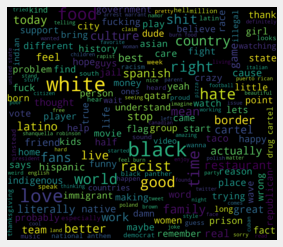

In [80]:
# Word Count
# word cloud visualization
allWords = ' '.join([twts for twts in twitter_df["Tweet"]])
#allWords = ' '.join([twts for twts in trying])
wordCloud = WordCloud(width=1500, height=1300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordCloud.to_file("imgs/cloud.png")

In [45]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [46]:
#Polarity= {"Negative": -1, "Neutral": 0, "Positive": 1}

twitter_df['Analysis'] = twitter_df['Polarity'].apply(getAnalysis)
# Show the dataframe
twitter_df

,Date,Tweet,Subjectivity,Polarity,Analysis
0,17-11-22 2:36,trump calling death penalty drug dealers ethni...,0.000000,0.000000,Neutral
1,17-11-22 2:36,mexicans happy spanish cute,0.666667,0.433333,Positive
2,17-11-22 2:35,trump calling death penalty drug dealers ethni...,0.000000,0.000000,Neutral
3,17-11-22 2:35,trump calling death penalty drug dealers ethni...,0.000000,0.000000,Neutral
4,17-11-22 2:35,relatively brief period groups allowed poured ...,0.466667,0.000000,Neutral
...,...,...,...,...,...
76411,20-11-22 1:55,geordie mexican pals business months bringing ...,0.500000,0.000000,Neutral
76412,20-11-22 1:55,trump worst terrorist treasonous traitor going...,0.500000,-0.500000,Negative
76413,20-11-22 1:54,great hire mexican work republicans,0.375000,0.400000,Positive
76414,20-11-22 1:54,going rank morocco lebanon ethiopian mexican h...,0.300000,-0.266667,Negative


In [47]:
#twitter_df[twitter_df.Analysis == "Negative"].count()
#twitter_df[twitter_df.Analysis == "Positive"].count()
twitter_df[twitter_df.Analysis == "Neutral"].count()

Date            33447
Tweet           33447
Subjectivity    33447
Polarity        33447
Analysis        33447
dtype: int64

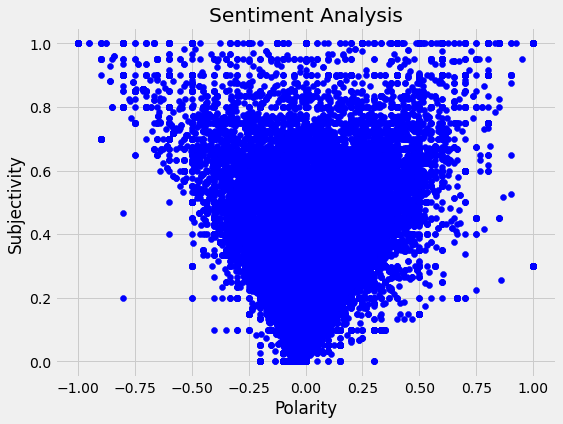

In [48]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, twitter_df.shape[0]):
    plt.scatter(twitter_df["Polarity"][i], twitter_df["Subjectivity"][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [49]:
# Print the percentage of positive tweets
ptweets = twitter_df[twitter_df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
ptweets

round( (ptweets.shape[0] / twitter_df.shape[0]) * 100 , 1)

32.1

In [50]:
# Print the percentage of negative tweets
ntweets = twitter_df[twitter_df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
ntweets

round( (ntweets.shape[0] / twitter_df.shape[0]) * 100, 1)

24.1

In [51]:
# Show the value counts
twitter_df['Analysis'].value_counts()

Neutral     33447
Positive    24526
Negative    18443
Name: Analysis, dtype: int64

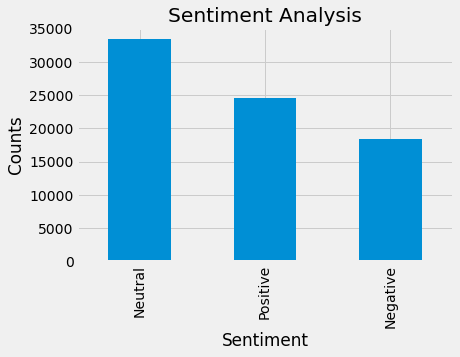

In [52]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
twitter_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()